<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 4

## Q1:Discrete FFT and Power Spectrum

In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib nbagg

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]

dc = dc[~np.isnan(dc)] #used to remove 'nan' values from data
jb = jb[~np.isnan(jb)] #used to remove 'nan' values from data

**1** Using the data from the hourly time series at Deep Cove (`dc`), show that the canned `fft` routine returns the correct discrete Fourier Transform of a suitable subset of the data (your choice on what subset).  You can do this graphically, by comparing the amplitude and the phase of the Fourier components, or simply show that the resulting numbers are the same.  

Some Hints: 
  - ignore bad data (rather than dealing with it "properly").  Make sure the units of your FT are: $\mathrm{^oC\, s}$.
  - If you want to compute the DFT efficiently, form the matrix $F$ referred to in the notes, and plot some of the time series associated with the different entries and make sure they look like Sines and Cosines and that the edge conditions are what you want.  Alternately, you can use your dft routine from the last assignment, and chose your frequencies properly.


In [107]:
#Creating the F matrix with N by N columns
N = 500

F = np.ones(shape=(N,N), dtype=complex)
for k in range(N): #denotes the row
    for n in range(N): #dentoes the column
        w = math.cos(2. * math.pi * k * n * 1/N) - 1.j * math.sin(2. * math.pi * k * n * 1/N)
        #print k,n,w.real, w.imag
        if math.fabs(w.real) < 10**-10:
            w = 0.0 + 1.j * w.imag
        if math.fabs(w.imag) < 10**-10:
            w = w.real + 1.j* 0.0 
        #print k,n,w.real, w.imag
        F[k,n] = w * 1/math.sqrt(N)

In [176]:
#With the matrix created, it can be used now for comparison
d = 0

ndc = dc[d:d+N]
X = N/2 * F * ndc
Xdc = np.fft.fft(ndc)
T = sum(ndc)/np.sum(X[0])
X = T*X
fX = np.ones(N, dtype=complex)
for ind in range(N):
    fX[ind] = np.sum(X[ind])

YOUR ANSWER HERE

<IPython.core.display.Javascript object>


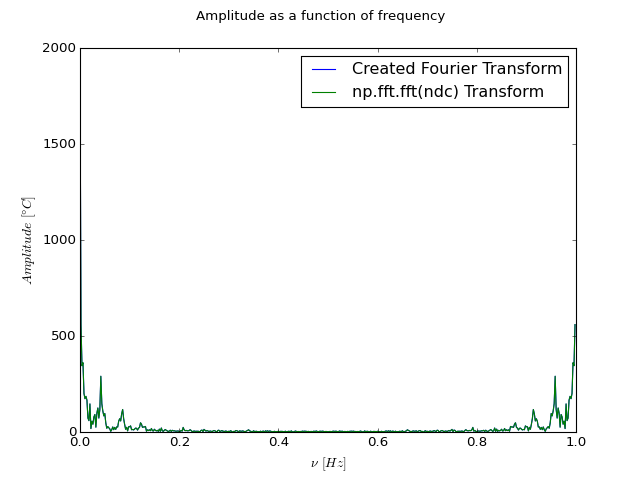

<IPython.core.display.Javascript object>


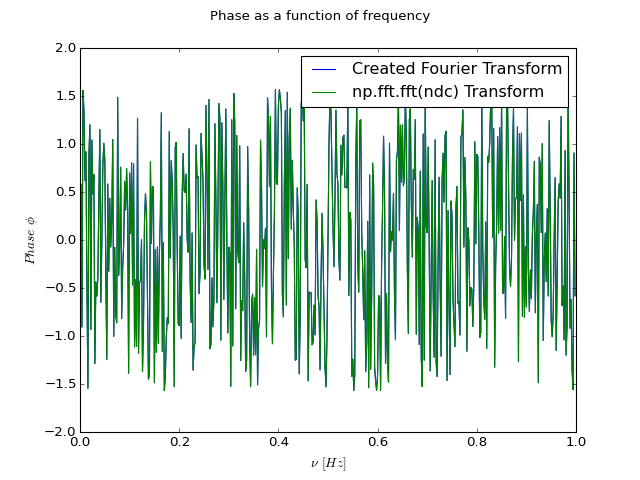

In [246]:
#Comparing the amplitude and phase
def ampthi(fX, N):
    A = np.zeros(N)
    thi = np.zeros(N)
    f = np.zeros(N)
    for i in range(N):
        A[i] = math.sqrt(math.fabs(fX[i].real**2 + fX[i].imag**2))
        thi[i] = math.atan(fX[i].imag / fX[i].real)  
        f[i] = 1.0 * i/N
    return A, thi, f    

#for ind in range(N):        
#        print fX[ind], A[ind], thi[ind]

A, thi, f = ampthi(fX, N)
AA, tthi, ff = ampthi(Xdc, N)

fig,ax=plt.subplots(1,1)
fig.suptitle('Amplitude as a function of frequency')
ax.plot(f,A,label='Created Fourier Transform')
ax.plot(ff,AA,label='np.fft.fft(ndc) Transform')
ax.legend(loc=0)
ax.set_xlabel(r'$\nu\, [Hz]$')
ax.set_ylabel(r'$Amplitude\, [\degree C]$')

fig,ax=plt.subplots(1,1)
fig.suptitle('Phase as a function of frequency')
ax.plot(f,thi,label='Created Fourier Transform')
ax.plot(ff,tthi,label='np.fft.fft(ndc) Transform')
ax.legend(loc=0)
ax.set_xlabel(r'$\nu\, [Hz]$')
ax.set_ylabel(r'$Phase\, \phi $' )    

As you can see from the two plots created, that the function np.fft.fft will return a discrete Fourier Transform of the function put into it.
This is apparant from the two graphs produced since the amplitudes and phases completely overlap, thus they do in fact have the same numbers at each point. So the function np.fft.fft will return a discrete Fourier Transform of a function x when input into it.


**2** Now, we can go ahead and use `np.fft.fft`.  Estimate the power spectrum for the Deep Cove time series (again go ahead and skip over gaps, though some of the bigs ones will screw up your frequencies a bit)

  - Use *all* the data.  
  - Report your results in proper SI units.
  - Indicate on your plot at least a couple of important frequencies

24357 24357


<IPython.core.display.Javascript object>


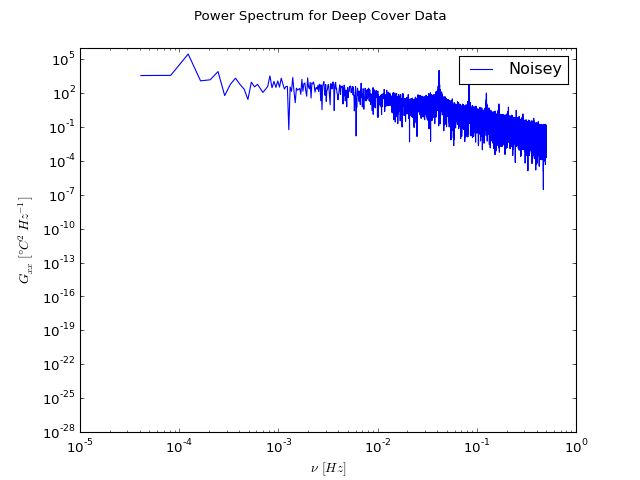

[]

In [322]:
newdc = dc[~np.isnan(dc)] #used to remove 'nan' values from data
XX = np.fft.fft(newdc)
f = np.linspace(0,1000,XX.size)
ff = np.fft.fftfreq(newdc.size)
print ff.size, XX.size

Sxx = np.abs(XX)**2/XX.size
Gxx =  Sxx

fig,ax=plt.subplots()
fig.suptitle('Power Spectrum for Deep Cover Data')
ax.plot(ff,Gxx, label='Noisey')
ax.set_xlabel(r'$\nu \, [Hz]$')
ax.set_ylabel(r'$G_{xx}\, [\degree C^2 Hz^{-1}]$')
ax.legend(loc=0)
ax.loglog()

YOUR ANSWER HERE

**3** Demonstrate Parceval's Theorem applies to your spectral estimate.  i.e. show that 

\begin{equation}
  \sigma_x^2=\int_0^{\infty} G_{xx}(f)\ \mathrm{d}f
\end{equation}

applies to your estimate of $G_{xx}(f)$.

In [332]:
df = ff[2]-ff[1]
sigma = np.sum(Gxx*df)
sigma1 = np.var(dc)
print 'Parceval\'s Theorem : ' +str(sigma)
print 'Variance of Deep Cove Data : ' +str(sigma1)

Parceval's Theorem : 36.8172572917
Variance of Deep Cove Data : 36.8172572917


## Q2: Emperically derive distribution of spectral estimate

**1** Write a short function to create a "red" time series by taking the cumulative sum of Normally distributed random data, and plot one realization.  The number of data points $N$ can be relatively small (say 1000).

<IPython.core.display.Javascript object>


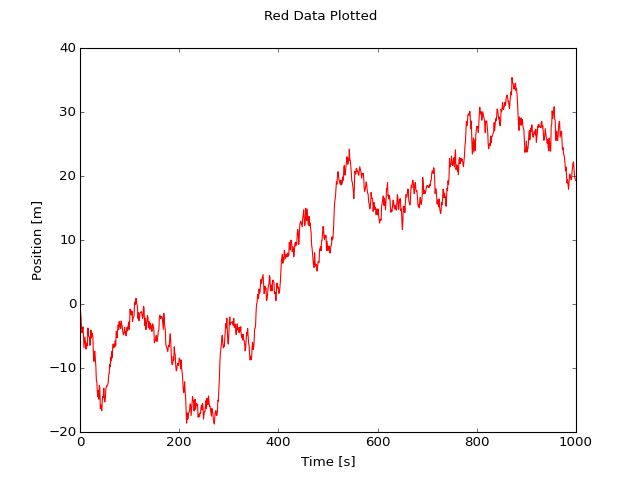

In [357]:
def red(N):
    x = np.cumsum(np.random.normal(0,1,N))
    time = np.arange(N)
    return x, time

x,time = red(1000)

fig,ax=plt.subplots()
fig.suptitle('Red Data Plotted')
ax.plot(time,x, color='red')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Position [m]')
ax.legend(loc=0)

**2** Write a second function to return the estimate of the power spectrum of $x$.  For posterity sake, include a value of the sampling frequency, and return the proper frequencies for the estimate.  Plot the resulting spectrum.

<IPython.core.display.Javascript object>


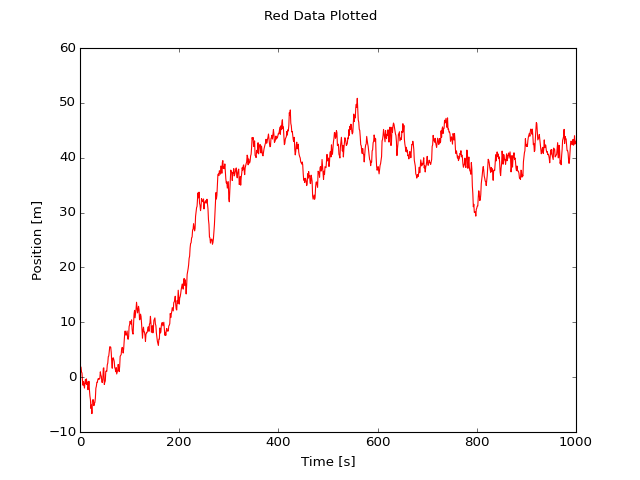

<IPython.core.display.Javascript object>


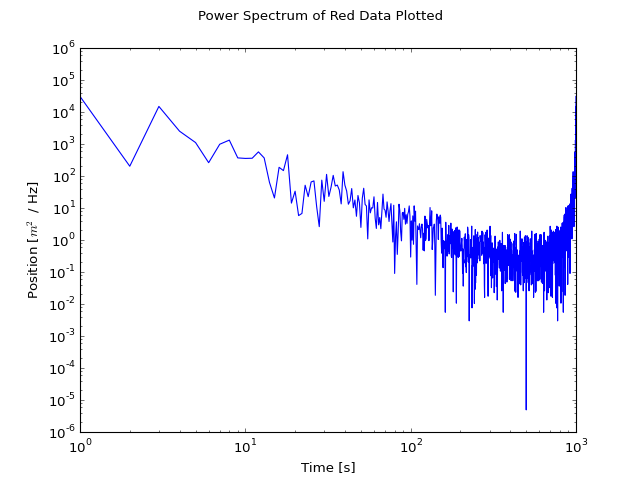

In [353]:
def power(x,f):
    X = np.fft.fft(x)
    T = x.size
    ff = np.zeros(len(x))
    for ind in range(len(x)):
        ff[ind] = int(ind*f)
    Sxx = np.abs(X)**2/T
    return Sxx, ff
        
freq = 1
xx, tt = red(1000)
Sxx, ff = power(xx, freq)

fig,ax=plt.subplots()
fig.suptitle('Red Data Plotted')
ax.plot(time,x, color='red')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Position [m]')
ax.legend(loc=0)

fig,ax=plt.subplots()
fig.suptitle('Power Spectrum of Red Data Plotted')
ax.loglog(ff,Sxx, color='blue')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Position [$m^2$ / Hz]')
ax.legend(loc=0)

**3** Now do the Monte-Carlo, by running the above 100 times and plotting the resulting spectral estimates as dots on the same plot. As you are making your data, save it into an array.  I did something like:
```python
    Gxs = zeros((1000,501))
    # inside my loop:
        Gxs[ind,:]=Gxx   
```

<IPython.core.display.Javascript object>


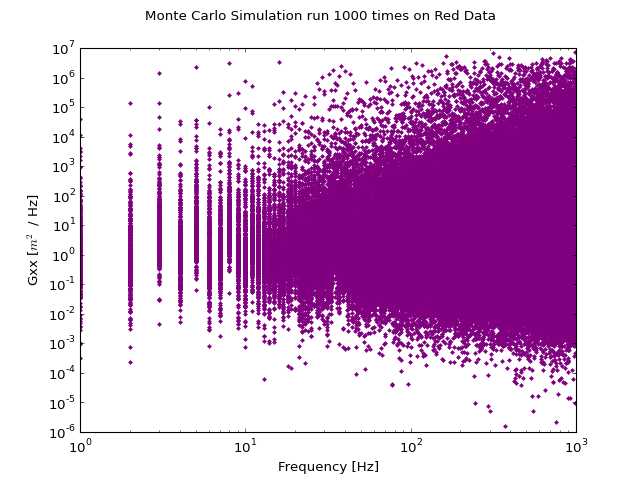

In [362]:
Gxs = np.zeros((1000,501))
freq = 1
freq1 = np.zeros(1000)
for i in range(1000):
    x,t = red(1000)
    Sxx, freq1 = power(x,freq)
    Gxx = 2. * Sxx[:501] 
    Gxs[i,:] = Gxx 

fig,ax=plt.subplots()
fig.suptitle('Monte Carlo Simulation run 1000 times on Red Data')
ax.loglog(freq1,Gxs, '.', color = 'purple')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Gxx [$m^2$ / Hz]')
ax.legend(loc=0)

**4** Now, on the same plot, add the mean of all your $G_{xx}(f)$ estimates (as a function of $f$), and the upper and lower bounds encompasing 95% of the data. (Hint, sort each column of your matrix - `np.sort` - and plot the value at $0.025 N$ and $0.975 N$).


<IPython.core.display.Javascript object>


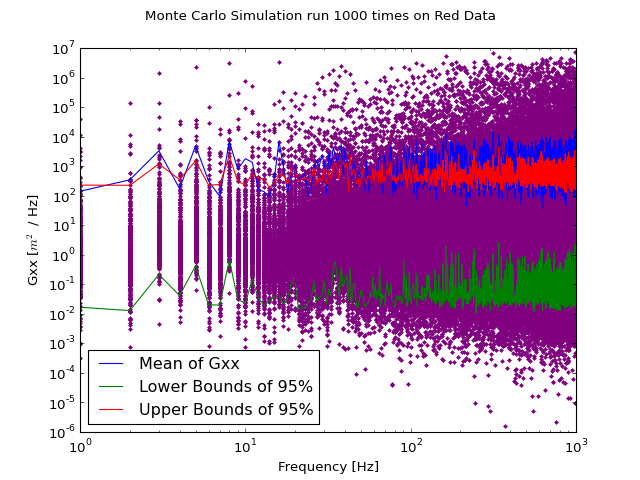

In [480]:
N = len(Gxs)
P = Gxs[0].size
#print N,P, P/N
#print freq1.size
mean = np.zeros(N)
low = np.zeros(N)
up = np.zeros(N)
lowlimit = int(0.025*P)
uplimit = int(0.975*P)
for i in range(N):
    G = np.sort(Gxs[i])
    mean[i] = np.mean(G)
    low[i] = G[lowlimit]
    up[i] = G[uplimit]
    
fig,ax=plt.subplots()
fig.suptitle('Monte Carlo Simulation run 1000 times on Red Data')
ax.loglog(freq1,Gxs, '.', color = 'purple')
ax.loglog(freq1,mean, color = 'blue', label='Mean of Gxx')
ax.loglog(freq1,low, color = 'green', label='Lower Bounds of 95%')
ax.loglog(freq1,up, color = 'red', label='Upper Bounds of 95%')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Gxx [$m^2$ / Hz]')
ax.legend(loc=0)

YOUR ANSWER HERE

**5** Show that the ratio of the lower and upper bounds of your spectral estimates spread compares favourably with the ratio between the lower and upper 95% confidence bounds of the  $\chi^2_2$ distribution.  Comment on any difference.

<IPython.core.display.Javascript object>


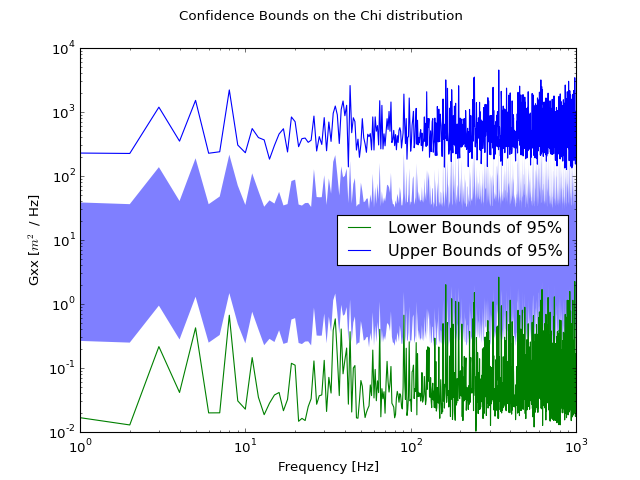

In [497]:
import scipy.stats as stats
inter = stats.chi2.interval(0.95,df=2)
chi = np.zeros(2)
chi[0] = 2. / inter[0] # 39.4978902052
chi[1] = 2. / inter[1] # 0.271085030682
mid = np.zeros(N)
midlimit = int(0.5*P)
for i in range(N):
    G = np.sort(Gxs[i])
    mid[i] = G[midlimit] 
fig,ax=plt.subplots()
fig.suptitle('Confidence Bounds on the Chi distribution')
#ax.loglog(freq1,mean, color='red')
ax.fill_between(freq1,chi[1]*mid,chi[0]*mid,alpha=0.5,linewidth=0.0,edgecolor=None,color=None,facecolor='b')
ax.loglog(freq1,low, color = 'green', label='Lower Bounds of 95%')
ax.loglog(freq1,up, color = 'blue', label='Upper Bounds of 95%')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Gxx [$m^2$ / Hz]')
ax.legend(loc=0)

YOUR ANSWER HERE